## Introduction

This tutorial will introduce you to a straight-forward yet powerful classification algorithm, the k-Nearest Neighbor(kNN). When asked to predict the class for an unseen data instance, kNN will search the entire training dataset for the nearest k data points. It then takes a majority vote from the classes of those k neighbors, and assign that class to the new data instance. Despite it's simplicity, kNN works incredibly well in practice, and has a wide application ranging from computer vision to gene expression, and many other fields.



### Tutorial content

This tutorial first walks you through a toy kNN classification example with two numeric attributes and binary classification to get you familiarize with the basics. The tutorial uses Matplotlib to plot the data points for a better visual aid. After you get some sense of how kNN works, more properties about kNN will be discussed, as well as some general performance tuning techniques. And finally, we'll put everything together, and show you a much more comprehensive and practical application of kNN on letter recognition. Data for the application will be collected from UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets.html).


In [156]:
import numpy as np
import csv
import math
import random


## Town of Cats and Dogs

In a faraway land there is this little town, whose residents are cats and dogs only. Generally, cats tend to live closer with other cats and dogs likewise. However, there are some of them who embrace the diversity don't mind living close to the other species. The town is welcoming a new resident, and we already know the location in town where he/she chooses to build a house. And now, we would like to predict whether our new resident is a cat or a dog using kNN.


### Understand and Load the data

Every instance in the training set is consisted of the house location and the species(label) of a resident, while the location is represented by coordinates (two floats representing x- and y- coordinate respectively) and the label would be either 'c' (for cat) or 'd'(for dog).

The training set has 20 data points, 10 of them labeled 'c' and the other 10 labeled 'd'. Data is pre-generated and stored in a CSV file. We will read the training data into a list of dictionaries for further processing.

In [111]:
training_data = []
with open('example1_training.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        d = {'coordinates' : (float(row['c1']), float(row['c2'])), 'label' : row['label']}
        training_data.append(d)
print training_data
print ("\nNumber of examples in training data: " + str(len(training_data)))

[{'coordinates': (2.5, 2.5), 'label': 'c'}, {'coordinates': (3.0, 5.0), 'label': 'c'}, {'coordinates': (2.0, 17.0), 'label': 'd'}, {'coordinates': (6.5, 8.0), 'label': 'c'}, {'coordinates': (9.0, 9.0), 'label': 'd'}, {'coordinates': (6.5, 11.0), 'label': 'd'}, {'coordinates': (9.0, 12.0), 'label': 'c'}, {'coordinates': (6.0, 13.0), 'label': 'c'}, {'coordinates': (7.0, 15.0), 'label': 'c'}, {'coordinates': (11.0, 1.0), 'label': 'd'}, {'coordinates': (14.0, 6.0), 'label': 'd'}, {'coordinates': (11.0, 10.0), 'label': 'c'}, {'coordinates': (13.5, 12.0), 'label': 'd'}, {'coordinates': (10.5, 17.0), 'label': 'c'}, {'coordinates': (16.0, 4.0), 'label': 'd'}, {'coordinates': (16.5, 6.0), 'label': 'c'}, {'coordinates': (17.0, 8.0), 'label': 'd'}, {'coordinates': (17.5, 12.0), 'label': 'd'}, {'coordinates': (17.0, 13.0), 'label': 'd'}, {'coordinates': (18.0, 17.0), 'label': 'c'}]

Number of examples in training data: 20


### Compute distances and get nearest k neighbors

In this example, we'll be using k=5. Normally, k takes the value of sqrt(n) (the reason will be discussed later) and should be an odd number for binary classification problems to avoid ties.

In order to identify the 5 nearest neighbors, we will need to calculate the distance between our test data point and any single point in training data. Since both x- and y- coordinates are represented as numeric value, we can simply use the Euclidean distance measure.

In [157]:
# Randomly generate the x- and y- coordinates for the test data
test_c1 = random.uniform(0, 20)
test_c2 = random.uniform(0, 20)

# Helper function for calculating the Euclidean distance of two points
def euclideanDistance(p1, p2):
    distance = pow(p1[0]-p2[0],2) + pow(p1[1]-p2[1],2)
    return math.sqrt(distance)

def getKNearestNeighbors(trainingSet, testInstance, k):
    distances = []
    for row in trainingSet:
        distance = euclideanDistance(row['coordinates'], testInstance)
        distances.append((distance, row['label']))
    distances.sort(key=lambda x: x[0])
    k_neighbors = []
    for i in range(k):
        k_neighbors.append(distances[i][1])
    return k_neighbors


In [158]:
k_neighbors = getKNearestNeighbors(training_data, (test_c1, test_c2), 5)
print (test_c1, test_c2)
print k_neighbors

(6.225220035038335, 16.066385214848065)
['c', 'c', 'd', 'c', 'c']


### Get the majority vote 

We are finally ready to make the prediction. Given the labels (aka classes) of the k=5 nearest neighbors, we will count the occurence of each label (in our case there are only two of them). The label that has got the most counts will be the label that kNN assign to the test data instance.

In [159]:
import operator

def getMajorityVote(neighbors):
    votes = {}
    for i in neighbors:
        if i in votes.keys():
            votes[i] += 1
        else:
            votes[i] = 1
    sorted_votes = sorted(votes.iteritems(), key=operator.itemgetter(1), reverse=True)
    return sorted_votes, sorted_votes[0][0]

    

In [160]:
sorted_votes, predicted_label = getMajorityVote(k_neighbors)
print sorted_votes
print predicted_label

[('c', 4), ('d', 1)]
c


### Visualize the data

Up to this point, we have seen all the essential parts of kNN algorithm. Since we do not have a known label for our test data, we are not able to verify the accuracy of the classification by kNN. However, we can visualize the data to have a more direct feeling of the layout of training data, and therefore, whether classification "makes sense"


In [161]:
import matplotlib
# Use svg backend for better quality
matplotlib.use("svg")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0) # you should adjust this to fit your screen

In [162]:
def plot_training (training_data, test_c1, test_c2):
    training_x_d = []
    training_y_d = []
    training_x_c = []
    training_y_c = []
    for instance in training_data:
        if instance['label'] == 'd':
            training_x_d.append(instance['coordinates'][0])
            training_y_d.append(instance['coordinates'][1])
        else:
            training_x_c.append(instance['coordinates'][0])
            training_y_c.append(instance['coordinates'][1])

    plt.scatter(np.asarray(training_x_d), np.asarray(training_y_d), 100,'r','^')
    plt.scatter(np.asarray(training_x_c), np.asarray(training_y_c), 50,'b','s')
    plt.scatter(np.asarray([test_c1]), np.asarray([test_c2]), 500, 'yellow', '*')



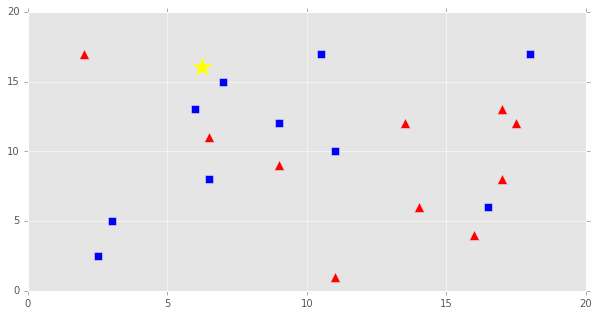

In [163]:
s = plot_training(training_data, test_c1, test_c2)
plt.show()


In the scatter plot, red triangles denote the cat families, blue squares the dog families, and yellow star the new resident. If we are to make a guess of whether the new resident is cat or dog by simply looking at the plot, 'dog' would probably be a reasonable answer, which is exactly what the kNN algorithm has shown.

### Some observations

After seeing the above example, now is a good time to discuss some important properties of kNN.

#### 1. kNN is a lazy learning algorithm
As you might have noticed, there is no explicit "training phase" when using kNN algorithm. It keeps all training data and does not try to learn any generalized rules (models) from those samples. This could be a useful property when you don't want to make any assumptions about the data (for example, data could be linearly parameterized as in linear regression).

#### 2. Choice of k
Suppose the algorithm tries to find the k nearest neighbors after computing all distances. When k=1, we only need to traverse all distances once, therefore O(n). As k increases, sorting the distances tends to take longer. In the worst case when k equals size of training data, n, we will have to sort all distances, therefore O(n*logn). However, when k is relatively big, the algorithm becomes more resistant to noises since it takes into consideration a larger subset of training data when predicting the new instance. 

#### 3. Calculating the distance
It's reasonable to use Euclidean distance when all features contain only numerical data. For other types of data such as categorical, Hamming distance could be useful (the most straight-forward case would be counting the number of features that are the same). You could assign various weights to different features when calculating the distance. More often, distance itself is used as a weight when gathering the votes from the k nearest neighbors. The weight in the vote is generally inversely proportional to the distance, if we consider closer neighbors more important than further neighbors.  

## Letter Recognition - A more comprehensive example

At this point, you are probably ready for a real-world example that uses moderate amount of training and test data. This tutorial will show you how kNN algorithm could be applied for letter recognition.

The dataset we use is obtained from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Letter+Recognition. There are 20,000 labeled datapoints in total, and we will split those into 10,000 + 10,000 (training + testing). Each datapoint contains 1 label (capital A-Z) and 16 integer attributes of a given letter. For more information regarding the metrics, please refer to the above link.

We first read in and process the data to create our training and test set:

In [ ]:
LR_training_X = []
LR_training_y = []
LR_test_X = []
LR_test_y = []
with open('letter-recognition.data') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        LR_training_X.append(np.asarray(map(int, row[1:])))
        LR_training_y.append(row[0])
LR_test_X = LR_training_X[10000:]
LR_test_y = LR_training_y[10000:]
LR_training_y = LR_training_y[:10000]
LR_training_X = LR_training_X[:10000]
print LR_training_X[:5]
print LR_training_y[:5]
print (len(LR_training_X), len(LR_training_y), len(LR_test_X), len(LR_test_y))


Below is the put-together kNN algorithm that takes in training and test data, predicts the label for each instance in test set, and gives the error rate of the prediction. Since the features are consisted of numerical values only, we compute the distances using 2-norm. The rest of the steps are very similar to the previous example, as the concept of the algorithm holds the same.

In [152]:
from numpy import linalg as LA
def kNN(training_X, training_y, test_X, test_y, k):
    """
    Input:
    training_X: a list of arrays that each contain a sample data instance
    training_y: a list of labels of training data
    test_X: a list of arrays each contains a test data instance
    test_y: a list of true labels of test data
    
    Output:
    prediction: a list of predicted labels for test data test_X
    error: the error rate of the prediction (#incorrectly-classified instances/total # test instances)
    
    """
    predictions = []
    error = 0
    for i, test_instance in enumerate(test_X):
        # Calculate and sort distances
        distances = []
        for j, training_instance in enumerate(training_X):
            d = LA.norm(test_instance - training_instance)
            distances.append((d, training_y[j]))
        distances.sort(key=lambda x: x[0])
        
        # find the k nearest neighbors
        k_neighbors = []
        for j in range(k):
            k_neighbors.append(distances[j][1])
        
        # get the majority vote
        sorted_votes, predicted_label = getMajorityVote(k_neighbors)
        predictions.append(predicted_label) 
        error += 0 if test_y[i] == predicted_label else 1
    return predictions, float(error)/len(test_X)
        


In [155]:
"""Note: The following code might take very long. I didn't time it but most likely more than 30 minutes."""
for k in range(1,11):
    predictions, error_rate = kNN(LR_training_X, LR_training_y, LR_test_X, LR_test_y, k)
    print predictions[:10], error_rate

['W', 'J', 'D', 'O', 'Q', 'H', 'R', 'T', 'U', 'K'] 0.0585
['W', 'J', 'D', 'O', 'Q', 'H', 'R', 'T', 'U', 'K'] 0.0755
['W', 'J', 'D', 'O', 'Q', 'H', 'R', 'T', 'U', 'K'] 0.0638
['W', 'J', 'D', 'O', 'Q', 'H', 'R', 'T', 'U', 'K'] 0.0682
['W', 'J', 'D', 'O', 'Q', 'H', 'R', 'T', 'U', 'K'] 0.0694
['W', 'J', 'D', 'O', 'Q', 'H', 'R', 'T', 'U', 'K'] 0.0701
['W', 'J', 'D', 'O', 'Q', 'H', 'R', 'T', 'U', 'K'] 0.0707
['W', 'J', 'D', 'O', 'Q', 'H', 'R', 'T', 'U', 'K'] 0.0744
['W', 'J', 'D', 'O', 'Q', 'H', 'R', 'T', 'U', 'K'] 0.0757
['W', 'J', 'D', 'O', 'Q', 'H', 'R', 'T', 'U', 'K'] 0.0795


Except the sharp increase and decrease in error rate when k=1->2 and k=2->3, we see a gradual decrease of accuracy when k grows larger. We may infer from the result that, data points that belong to different clusters (i.e. have different labels) tend not to have a clear separation. This is to say that, if a data instance is not in the center of a cluster, its neighbors might contain data points that have other labels, which might interfere with the prediction. Do you have any other guesses?

#### References: 

https://saravananthirumuruganathan.wordpress.com/2010/05/17/a-detailed-introduction-to-k-nearest-neighbor-knn-algorithm/

http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_ml/py_knn/py_knn_opencv/py_knn_opencv.html#knn-opencv

http://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/
